In [10]:
import pandas as pd
import numpy as np

from hypothesis import given
from hypothesis import strategies as st
from hypothesis.extra.pandas import data_frames, column
from scipy.special import expit

import matplotlib.pyplot as plt
import seaborn as sns


# создадим DF для работы (генерация случайного ДатаФРейма)
# frame -> column{name, params}
data_frames(
    [
        column('id',
                elements=st.integers(min_value=0, max_value=100_000),
                dtype=int, 
                unique=True),
        column('rfm_value', 
                dtype='float'), 
        column('prob_retur',
                elements=st.floats(min_value=0, max_value=1, allow_nan=False))
    ]
).example()

,id,rfm_value,prob_retur
0,10555,NaN,0.824697
1,93147,NaN,0.533055
2,10338,NaN,0.871504
3,2906,-1.9,0.558471


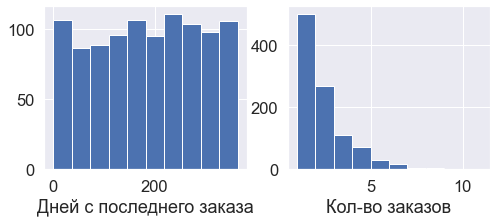

In [11]:
sns.set(font_scale=1.5)

# рассмотрим ещё вариант
df_customers = pd.DataFrame(
    {'days_since_last_order': np.random.randint(low=0, high=365, size=1000),
     'num_total_orders': np.random.geometric(0.5, size=1000)})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
df_customers.days_since_last_order.hist(ax=ax1)
df_customers.num_total_orders.hist(ax=ax2)
ax1.set_xlabel('Дней с последнего заказа')
ax2.set_xlabel('Кол-во заказов')
plt.show();

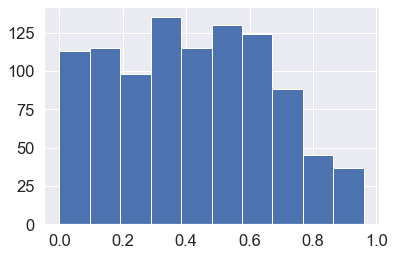

In [12]:
# функция расчета вероятности возврата пользователя (id) в магазин
def probality_loyal_customer(df):
    p_num_orders = df.num_total_orders.apply(expit)
    p_days_ago = df.days_since_last_order / df.days_since_last_order.max()
    p_loyal = p_days_ago * p_num_orders
    return p_loyal


prob_loyal = probality_loyal_customer(df_customers)
prob_loyal.hist()
plt.xlabel('');

### А как тестить?

In [13]:
def probality_loyal_customer(df):
    p_num_orders = df.num_total_orders.apply(expit)
    p_days_ago = df.days_since_last_order / df.days_since_last_order.max()
    p_loyal = p_days_ago * p_num_orders
    return p_loyal


@given(
    data_frames([
        column('days_since_last_order', dtype=int,
               elements=st.integers(min_value=0, max_value=365)),
        column('num_total_orders', dtype=int,
               elements=st.integers(min_value=0, max_value=1_000_000))])
)
def test_prob_loyality(df):
    # df == @given результат
    
    # проверяем, что вероятность от 0 до 1
    assert p.between(0, 1, inclusive=True).all()